In [1]:
import fastai
from fastai.vision import *

In [4]:
#!cd /storage && mkdir pix2pix && cd pix2pix && mkdir data

!cd .. && mkdir storage && cd storage && mkdir pix2pix && cd pix2pix && mkdir data

In [5]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9681 sha256=a522917860324b512d073aaa107955db7aa2aade9449353c3f9105accbd8de60
  Stored in directory: /home/isischameleon/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [6]:
# https://pypi.org/project/wget/
# https://docs.python.org/2/library/tarfile.html
import tarfile
import wget

downloaded_tars=list()
def get_tar(url: str, dest: str):
    filename = wget.download(url, dest)
    downloaded_tars.append({'path':dest, 'filename':filename})
    return filename

def _opentar(fname: str):
    tar=None
    if (fname.find('.tar') and fname.endswith('.gz')):
        tar = tarfile.open(fname, "r:gz")
    elif (fname.endswith(".tar")):
        tar = tarfile.open(fname, "r:")
    return tar

def untar(fname: str, dest:str='.'):
    tar = _opentar(fname)
    tar.list()
    tar.extractall(path=dest)
    tar.close()

def viewtar(fname: str):
    tar = _opentar(fname)
    tar = tarfile.open(fname, "r:gz")
    tar.list()
    tar.close()

def getuntarsize(fname: str):
    tar = _opentar(fname)
    tar = tarfile.open(fname, "r:gz")
    # to do
    tar.close()

In [13]:
 wget.download('http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/maps.tar.gzhttp://efrosgans.eecs.berkeley.edu/pix2pix/datasets/maps.tar.gz', 'storage/pix2pix/data''storage/pix2pix/data')

FileNotFoundError: [Errno 2] No such file or directory: './storage/pix2pix/datastorage/pix2pix/data4720b93s.tmp'

In [9]:
url_dataset='http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/maps.tar.gz'
# on gradient : dest='/storage/pix2pix/data'
dest='storage/pix2pix/data'

In [12]:
## ONLY EXECUTE FIRST TIME to download the dataset tar and extract it all
print(url_dataset)
print(dest)
filename=get_tar(url_dataset, dest)
print(filename)
print(dest)
untar(filename, dest)

http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/maps.tar.gz
storage/pix2pix/data


FileNotFoundError: [Errno 2] No such file or directory: './storage/pix2pix/datan79c0x_9.tmp'

In [87]:
print(dest)
os.listdir(dest)
#!rm /storage/pix2pix/data/maps.tar (1).gz

/storage/pix2pix/data


['maps', 'maps.tar (1).gz']

In [90]:
for t in downloaded_tars:
    print(t.filename)
    print(t.path)

In [89]:
# Setting up dataset path for fastai
path=Path(dest + '/maps')
path


PosixPath('/storage/pix2pix/data/maps')

# PREPARING DATA FOR TRAINING

Each image will be loaded, rescaled, and split into the satellite and Google map elements. The result will be 1,097 color image pairs with the width and height of 256×256 pixels.

In [103]:
!ls /storage/pix2pix/data/maps

train  val


In [104]:
il = ImageList.from_folder(path, presort=True).split_by_folder(train='train', valid='val')
il

ItemLists;

Train: ImageList (1096 items)
Image (3, 600, 1200),Image (3, 600, 1200),Image (3, 600, 1200),Image (3, 600, 1200),Image (3, 600, 1200)
Path: /storage/pix2pix/data/maps;

Valid: ImageList (1098 items)
Image (3, 600, 1200),Image (3, 600, 1200),Image (3, 600, 1200),Image (3, 600, 1200),Image (3, 600, 1200)
Path: /storage/pix2pix/data/maps;

Test: None

In [105]:
iil = ImageImageList.from_folder(path, presort=True).split_by_folder(train='train', valid='val')
iil

ItemLists;

Train: ImageImageList (1096 items)
Image (3, 600, 1200),Image (3, 600, 1200),Image (3, 600, 1200),Image (3, 600, 1200),Image (3, 600, 1200)
Path: /storage/pix2pix/data/maps;

Valid: ImageImageList (1098 items)
Image (3, 600, 1200),Image (3, 600, 1200),Image (3, 600, 1200),Image (3, 600, 1200),Image (3, 600, 1200)
Path: /storage/pix2pix/data/maps;

Test: None

In [99]:
il.items[10]

PosixPath('/storage/pix2pix/data/maps/train/568.jpg')

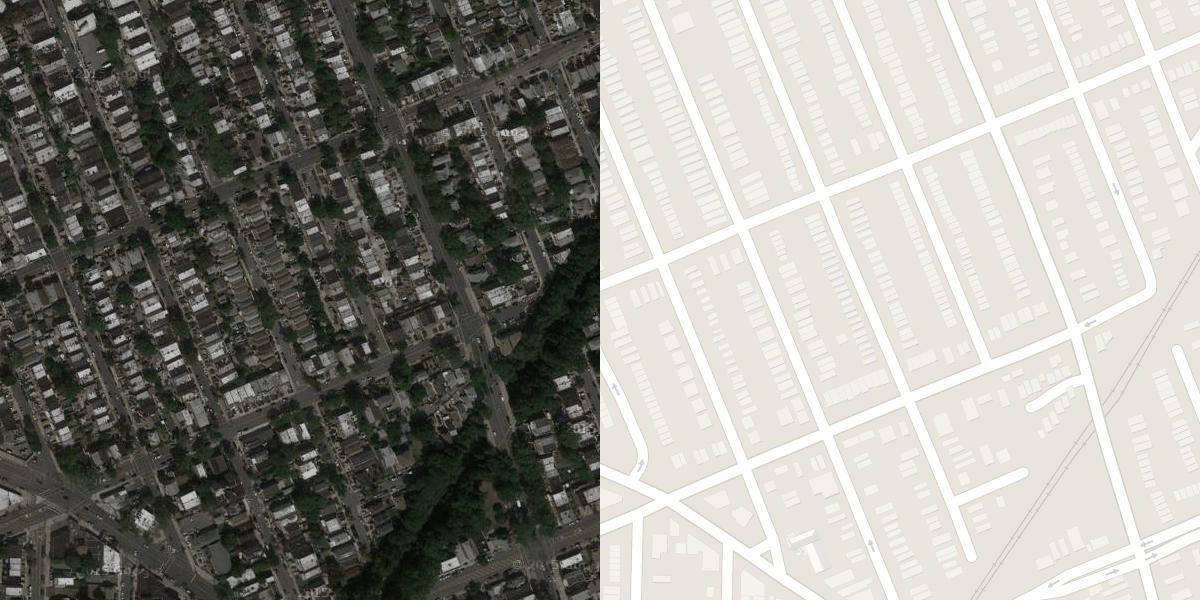

In [101]:
il[10]

On writing your won item list : https://docs.fast.ai/data_block.html#ItemList